## Task 1 - Data Analysis
Your task is to find a dataset of interest to you, that contains a mix of categorical and numerical variables.
<p></p>
As a guideline, the dataset should have a minimum of two categorical variables and three numerical variables.
<p></p>
(these miminum criteria are guidelines and not hard thresholds).
<p></p>

#### If you wish you can make use of the following websites to find the dataset:
<p></p>
- The Irish government data repository: https://data.gov.ie/
<p></p>
- Google dataset search: https://datasetsearch.research.google.com/
<p></p>
You must then use the methods covered in this course to complete an analysis and write a report on the
data using Python Notebook. The analysis of the data should involve the use of tables, numerical
summaries, and graphical summaries of the data.
<p></p>

#### This part of your assignment will be assessed in terms of:
<p></p>
- Use of appropriate functions in Python. [15 Marks]
<p></p>
- Clearly commenting the code in the .ipynb file. [5 Marks]
<p></p>
- Producing clear results for the chosen dataset, using appropriate statistical measures and appropriate plots. [15 Marks]
<p></p>
- The quality of the graphics included. [5 Marks]
<p></p>
- Summarising the conclusions from the analysis appropriately. [30 Marks]

### Summary

For our first tasks we will use 11 (from 2010 to 2020) datasets produced by the Property Services Regulatory Authority (PSRA), these datasets are publicly available at data.gov.ie.

During this task, we will get an insight of the residential property prices in Dublin, Ireland based on the price on which a property was sold.

We will observe:
- The data distribution of the prices
- How the residential property prices have changed throughout the years 2010 - 2020
- In which district residential property prices are higher and lower (using the median value)
- In which district residential property prices are higher and lower (using the mean value)

In [1]:
# Import all the necessary libraries to perform our tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Read all 11 datasets and take a look to their shapes

df10 = pd.read_csv('2010 - PSRA - Dublin Residential Property Price Register.csv', encoding='unicode_escape')
df11 = pd.read_csv('2011 - PSRA - Dublin Residential Property Price Register.csv', encoding='unicode_escape')
df12 = pd.read_csv('2012 - PSRA - Dublin Residential Property Price Register.csv', encoding='unicode_escape')
df13 = pd.read_csv('2013 - PSRA - Dublin Residential Property Price Register.csv', encoding='unicode_escape')
df14 = pd.read_csv('2014 - PSRA - Dublin Residential Property Price Register.csv', encoding='unicode_escape')
df15 = pd.read_csv('2015 - PSRA - Dublin Residential Property Price Register.csv', encoding='unicode_escape')
df16 = pd.read_csv('2016 - PSRA - Dublin Residential Property Price Register.csv', encoding='unicode_escape')
df17 = pd.read_csv('2017 - PSRA - Dublin Residential Property Price Register.csv', encoding='unicode_escape')
df18 = pd.read_csv('2018 - PSRA - Dublin Residential Property Price Register.csv', encoding='unicode_escape')
df19 = pd.read_csv('2019 - PSRA - Dublin Residential Property Price Register.csv', encoding='unicode_escape')
df20 = pd.read_csv('2020 - PSRA - Dublin Residential Property Price Register.csv', encoding='unicode_escape')

df10.shape, df11.shape, df12.shape, df13.shape, df14.shape, df15.shape, df16.shape, df17.shape, df18.shape, df19.shape, df20.shape 

((6935, 9),
 (5902, 9),
 (8916, 9),
 (10379, 9),
 (14171, 9),
 (15430, 9),
 (15753, 9),
 (17952, 9),
 (18626, 9),
 (9880, 9),
 (49333, 9))

In [3]:
# Knowing that they have the same amount of columns/features, we can now use the concat() function to gather all the data
# into 1 dataset to perform our analysis

df = pd.concat([df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20])
df.head(-10)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,"343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,"438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
2,04/01/2010,"12 Sallymount Avenue, Ranelagh",NaN,Dublin,"425,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"206 Philipsburgh Avenue, Marino, Dublin 3",NaN,Dublin,"430,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"22 Laverna Way, Castleknock, Dublin 15",NaN,Dublin,"355,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
...,...,...,...,...,...,...,...,...,...
49318,30/12/2020,"CHURCHTOWN, CRAGG, CASTLEISLAND",NaN,Kerry,"220,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
49319,30/12/2020,"CLONDOOGAN, SUMMERHILL, MEATH",NaN,Meath,"230,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
49320,30/12/2020,"GURTEEN, KILGARVAN, KILLARNEY",NaN,Kerry,"100,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
49321,30/12/2020,"KINNELARGY, DOWNINGS, DONEGAL",NaN,Donegal,"895,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [4]:
# Now that we have only 1 dataset, we can perform our Exploratory Data Analysis (EDA) and clean our data

df.dtypes

Date of Sale (dd/mm/yyyy)    object
Address                      object
Postal Code                  object
County                       object
Price ()                    object
Not Full Market Price        object
VAT Exclusive                object
Description of Property      object
Property Size Description    object
dtype: object

In [5]:
# Due to our objectives, we will not require addresses nor property size description

df.drop(columns=['Property Size Description', 'Address'], inplace=True)

In [6]:
print(df.columns) # Columns left

Index(['Date of Sale (dd/mm/yyyy)', 'Postal Code', 'County', 'Price ()',
       'Not Full Market Price', 'VAT Exclusive', 'Description of Property'],
      dtype='object')


In [7]:
# Rename our columns, getting rid of special characteres and spaces

df.columns = ['Sale_year', 'Postal_code', 'County', 'Price_euro', 'Not_Full_Market_Price', 'VAT_Exclusive', 'Property_Description']
df.head()

,Sale_year,Postal_code,County,Price_euro,Not_Full_Market_Price,VAT_Exclusive,Property_Description
0,01/01/2010,NaN,Dublin,"343,000.00",No,No,Second-Hand Dwelling house /Apartment
1,04/01/2010,NaN,Dublin,"438,500.00",No,No,Second-Hand Dwelling house /Apartment
2,04/01/2010,NaN,Dublin,"425,000.00",No,No,Second-Hand Dwelling house /Apartment
3,04/01/2010,NaN,Dublin,"430,000.00",No,No,Second-Hand Dwelling house /Apartment
4,04/01/2010,NaN,Dublin,"355,000.00",No,No,Second-Hand Dwelling house /Apartment


In [8]:
# We need to remove the special characteres from our Price_euro column to be able to assign it as a type float (numbers)

df['Price_euro'] = df['Price_euro'].str[1:] # Remove the first character from the column
df['Price_euro']

0          343,000.00
1          438,500.00
2          425,000.00
3          430,000.00
4          355,000.00
             ...     
49328      400,000.00
49329      367,000.00
49330    1,200,000.00
49331       30,000.00
49332      497,500.00
Name: Price_euro, Length: 173277, dtype: object

In [9]:
df['Price_euro'] = df['Price_euro'].str.replace(',','') # Remove the commas from the column
df['Price_euro']

0         343000.00
1         438500.00
2         425000.00
3         430000.00
4         355000.00
            ...    
49328     400000.00
49329     367000.00
49330    1200000.00
49331      30000.00
49332     497500.00
Name: Price_euro, Length: 173277, dtype: object

In [10]:
df['Price_euro'] = df['Price_euro'].astype(float) # Assign Price_euro column as a type float

In [11]:
df.dtypes

Sale_year                 object
Postal_code               object
County                    object
Price_euro               float64
Not_Full_Market_Price     object
VAT_Exclusive             object
Property_Description      object
dtype: object

In [12]:
df.describe() # Lets take a look to the descriptive statistics of our dataset

,Price_euro
count,1.732770e+05
mean,3.675671e+05
std,1.231907e+06
min,5.250000e+03
25%,1.850220e+05
50%,2.750000e+05
75%,3.980000e+05
max,1.823789e+08


In [13]:
df['Price_euro'].describe().apply('{0:.2f}'.format) # Descriptive statistics formatted for a better understanding

count       173277.00
mean        367567.06
std        1231907.25
min           5250.00
25%         185022.02
50%         275000.00
75%         398000.00
max      182378854.63
Name: Price_euro, dtype: object

In [14]:
df.info() # Information of our dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173277 entries, 0 to 49332
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Sale_year              173277 non-null  object 
 1   Postal_code            80352 non-null   object 
 2   County                 173277 non-null  object 
 3   Price_euro             173277 non-null  float64
 4   Not_Full_Market_Price  173277 non-null  object 
 5   VAT_Exclusive          173277 non-null  object 
 6   Property_Description   173277 non-null  object 
dtypes: float64(1), object(6)
memory usage: 10.6+ MB


In [15]:
# Knowing that we have missing values on Postal_code, we will need to do further cleaning
# We can start by taking a look for the unique values in each column

df.Postal_code.unique(), df.County.unique(), df.Not_Full_Market_Price.unique(), df.VAT_Exclusive.unique(), df.Property_Description.unique()

(array([nan, 'Dublin 14', 'Dublin 2', 'Dublin 13', 'Dublin 12', 'Dublin 4',
        'Dublin 11', 'Dublin 9', 'Dublin 24', 'Dublin 15', 'Dublin 22',
        'Dublin 5', 'Dublin 18', 'Dublin 6', 'Dublin 6w', 'Dublin 7',
        'Dublin 16', 'Dublin 8', 'Dublin 3', 'Dublin 1', 'Dublin 17',
        'Dublin 20', 'Dublin 10', 'Baile Átha Cliath 14',
        'Baile ?tha Cliath 17', 'Baile Átha Cliath 5', 'Ní Bhaineann',
        'Baile Átha Cliath 3', 'Baile Átha Cliath 15',
        'Baile Átha Cliath 4', 'Baile Átha Cliath 9',
        'Baile Átha Cliath 18'], dtype=object),
 array(['Dublin', 'Tipperary', 'Kerry', 'Meath', 'Carlow', 'Kildare',
        'Waterford', 'Limerick', 'Louth', 'Roscommon', 'Cork', 'Clare',
        'Offaly', 'Laois', 'Galway', 'Leitrim', 'Donegal', 'Kilkenny',
        'Wexford', 'Longford', 'Cavan', 'Sligo', 'Wicklow', 'Mayo',
        'Westmeath', 'Monaghan'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Second-Hand D

In [16]:
# Due that this analysis is only for Dublin, Ireland, we can remove other cities information

df.drop(df[df.County.isin(['Tipperary', 'Kerry', 'Meath', 'Carlow', 'Kildare',
        'Waterford', 'Limerick', 'Louth', 'Roscommon', 'Cork', 'Clare',
        'Offaly', 'Laois', 'Galway', 'Leitrim', 'Donegal', 'Kilkenny',
        'Wexford', 'Longford', 'Cavan', 'Sligo', 'Wicklow', 'Mayo',
        'Westmeath', 'Monaghan'])].index, inplace=True)

In [17]:
# Lets take another look to the unique values on our columns

df.Postal_code.unique(), df.County.unique(), df.Not_Full_Market_Price.unique(), df.VAT_Exclusive.unique(), df.Property_Description.unique()

(array([nan, 'Dublin 9', 'Dublin 24', 'Dublin 13', 'Dublin 15', 'Dublin 6',
        'Dublin 12', 'Dublin 14', 'Dublin 3', 'Dublin 16', 'Dublin 11',
        'Dublin 7', 'Dublin 8', 'Dublin 4', 'Dublin 5', 'Dublin 20',
        'Dublin 6w', 'Dublin 18', 'Dublin 17', 'Dublin 22', 'Dublin 1',
        'Dublin 2', 'Dublin 10', 'Baile Átha Cliath 14', 'Ní Bhaineann',
        'Baile Átha Cliath 4', 'Baile Átha Cliath 18'], dtype=object),
 array(['Dublin'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Second-Hand Dwelling house /Apartment',
        'New Dwelling house /Apartment', 'Teach/Árasán Cónaithe Atháimhe'],
       dtype=object))

In [18]:
# This analysis will be only with values in English, thus we can remove the following values

df.drop(df[df.Postal_code.isin(['Baile Átha Cliath 14', 'Ní Bhaineann',
        'Baile Átha Cliath 4', 'Baile Átha Cliath 18'])].index, inplace=True)

In [19]:
# Lets take another look to the unique values on our columns

df.Postal_code.unique(), df.County.unique(), df.Not_Full_Market_Price.unique(), df.VAT_Exclusive.unique(), df.Property_Description.unique()

(array([nan, 'Dublin 9', 'Dublin 24', 'Dublin 13', 'Dublin 15', 'Dublin 6',
        'Dublin 12', 'Dublin 14', 'Dublin 3', 'Dublin 16', 'Dublin 11',
        'Dublin 7', 'Dublin 8', 'Dublin 4', 'Dublin 5', 'Dublin 20',
        'Dublin 6w', 'Dublin 18', 'Dublin 17', 'Dublin 22', 'Dublin 1',
        'Dublin 2', 'Dublin 10'], dtype=object),
 array(['Dublin'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Second-Hand Dwelling house /Apartment',
        'New Dwelling house /Apartment', 'Teach/Árasán Cónaithe Atháimhe'],
       dtype=object))

In [20]:
# This analysis will be only with values in English, thus we can remove the following values

df.drop(df[df.Property_Description.isin(['Teach/Árasán Cónaithe Atháimhe'])].index, inplace=True)

In [21]:
# Lets take another look to the unique values on our columns

df.Postal_code.unique(), df.County.unique(), df.Not_Full_Market_Price.unique(), df.VAT_Exclusive.unique(), df.Property_Description.unique()

(array([nan, 'Dublin 9', 'Dublin 24', 'Dublin 13', 'Dublin 15', 'Dublin 6',
        'Dublin 12', 'Dublin 14', 'Dublin 3', 'Dublin 16', 'Dublin 11',
        'Dublin 7', 'Dublin 8', 'Dublin 4', 'Dublin 5', 'Dublin 20',
        'Dublin 6w', 'Dublin 18', 'Dublin 17', 'Dublin 22', 'Dublin 1',
        'Dublin 2', 'Dublin 10'], dtype=object),
 array(['Dublin'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Second-Hand Dwelling house /Apartment',
        'New Dwelling house /Apartment'], dtype=object))

In [22]:
df.isnull().sum() # How many null values do we have

Sale_year                    0
Postal_code              21718
County                       0
Price_euro                   0
Not_Full_Market_Price        0
VAT_Exclusive                0
Property_Description         0
dtype: int64

In [23]:
df = df.dropna() # Remove all the rows with null values

In [24]:
df.isnull().sum() # Check for null values

Sale_year                0
Postal_code              0
County                   0
Price_euro               0
Not_Full_Market_Price    0
VAT_Exclusive            0
Property_Description     0
dtype: int64

In [25]:
df.shape # shape of our current dataset

(31135, 7)

In [26]:
# Descriptive statistics formatted for a better understanding, from our current dataset

df['Price_euro'].describe().apply('{0:.2f}'.format)

count        31135.00
mean        429895.36
std        1646229.30
min           5700.00
25%         220000.00
50%         306500.00
75%         440000.00
max      134261047.00
Name: Price_euro, dtype: object

In [27]:
df.head(-5) # Show our dataset

,Sale_year,Postal_code,County,Price_euro,Not_Full_Market_Price,VAT_Exclusive,Property_Description
36,08/01/2010,Dublin 9,Dublin,251000.00,No,No,Second-Hand Dwelling house /Apartment
39,08/01/2010,Dublin 24,Dublin,298000.00,No,No,Second-Hand Dwelling house /Apartment
52,08/01/2010,Dublin 13,Dublin,330000.00,No,No,Second-Hand Dwelling house /Apartment
63,08/01/2010,Dublin 13,Dublin,177685.95,No,Yes,New Dwelling house /Apartment
83,12/01/2010,Dublin 13,Dublin,290000.00,No,No,Second-Hand Dwelling house /Apartment
...,...,...,...,...,...,...,...
49304,24/12/2020,Dublin 13,Dublin,1200000.00,No,No,Second-Hand Dwelling house /Apartment
49307,28/12/2020,Dublin 6,Dublin,650000.00,No,No,Second-Hand Dwelling house /Apartment
49309,29/12/2020,Dublin 3,Dublin,2765000.00,No,No,Second-Hand Dwelling house /Apartment
49316,30/12/2020,Dublin 9,Dublin,390000.00,No,No,Second-Hand Dwelling house /Apartment


In [28]:
# We only want the year in which a property was sold, therefore we will remove day and month from the column

df['Sale_year'] = df['Sale_year'].str[6:]
df['Sale_year']

36       2010
39       2010
52       2010
63       2010
83       2010
         ... 
49322    2020
49325    2020
49327    2020
49328    2020
49330    2020
Name: Sale_year, Length: 31135, dtype: object

In [29]:
# Now that we have only the year value, we can assign the column as a integer (number without decimals)

df['Sale_year'] = df['Sale_year'].astype(int)
df.dtypes

Sale_year                  int32
Postal_code               object
County                    object
Price_euro               float64
Not_Full_Market_Price     object
VAT_Exclusive             object
Property_Description      object
dtype: object

In [30]:
# Now that we have only the data from Dublin, we can remove our County feature

df.drop(columns=['County'], inplace=True)

In [31]:
df.info() # Information of our current dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31135 entries, 36 to 49330
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sale_year              31135 non-null  int32  
 1   Postal_code            31135 non-null  object 
 2   Price_euro             31135 non-null  float64
 3   Not_Full_Market_Price  31135 non-null  object 
 4   VAT_Exclusive          31135 non-null  object 
 5   Property_Description   31135 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 1.5+ MB


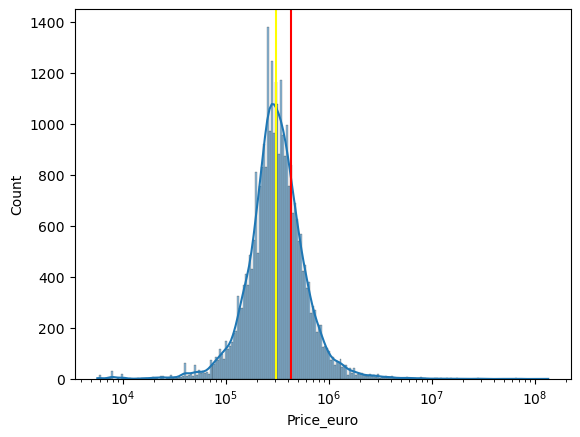

In [32]:
#Plot the prices of houses in Dublin; scaled to be able to observe it better
sns.histplot(data=df, x='Price_euro', log_scale=True, kde=True)

plt.axvline(x=df.Price_euro.mean(), color='red') # Add the mean value of the price with a vertical red line
plt.axvline(x=df.Price_euro.median(), color='yellow') # Add the median value of the price with a vertical yellow line

<Axes: xlabel='Sale_year', ylabel='Price_euro'>

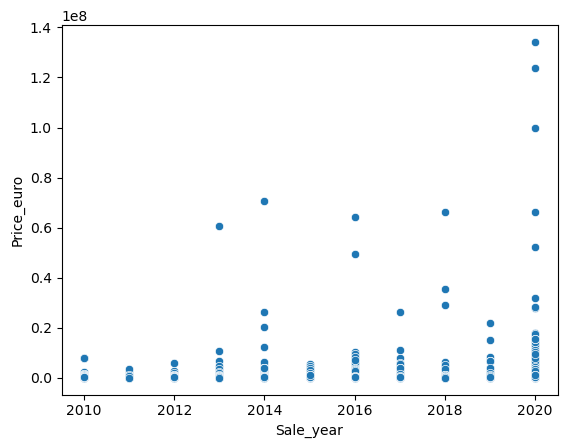

In [33]:
# Lets observe the prices throughout the years

sns.scatterplot(data=df, x='Sale_year', y='Price_euro')

In [34]:
df['Postal_code'].nunique() # Count the unique values in the Postal code column for our next plot

22

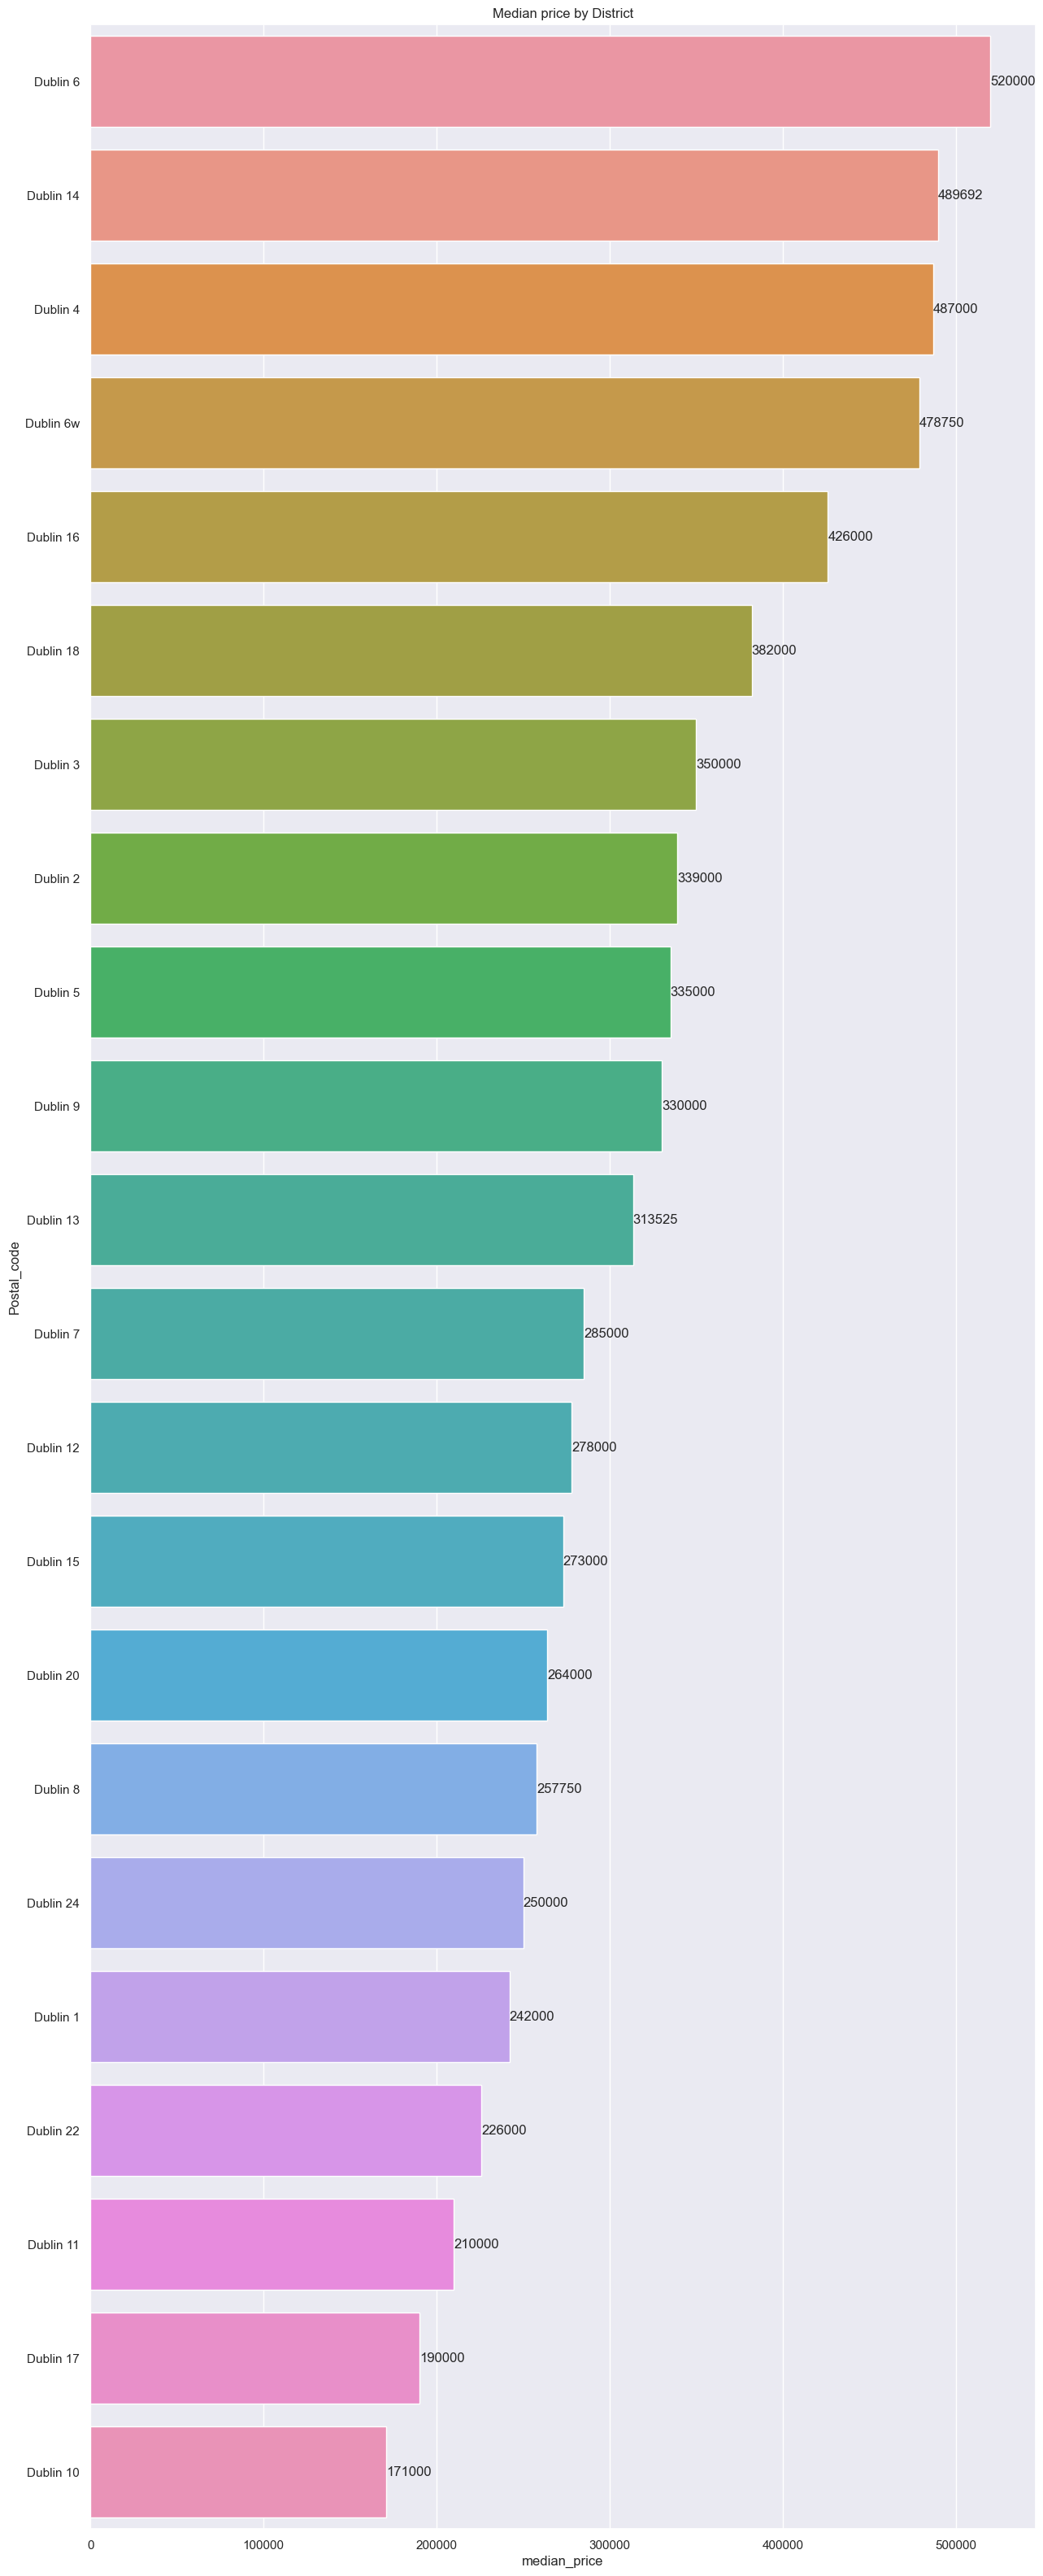

In [35]:
sns.set(rc={"figure.figsize":(15,40)}) # Size of our plot

# Plot our 22 unique values from Postal_code sorted by the median value of Price_euro
ax = sns.barplot(data=df.groupby(by='Postal_code')['Price_euro'].median().reset_index(name="median_price").sort_values('median_price', ascending=False).head(22), 
              y='Postal_code', x='median_price')


ax.set(title="Median price by District") # Title

# label each bar in barplot
for p in ax.patches:
    height = p.get_height() # Height of each horizontal bar is the same
    width = p.get_width() # Width (prices)
    # Add text to each bar
    ax.text(x = width, # x-coordinate position of data label
            y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
            s = "{:.0f}".format(width), # Data label, formatted to ignore decimals
            va = "center") # Sets vertical alignment to center
    
#plt.savefig('seaborn_plot_fig3.jpg', format='jpg') # Save the plot as a jpg file

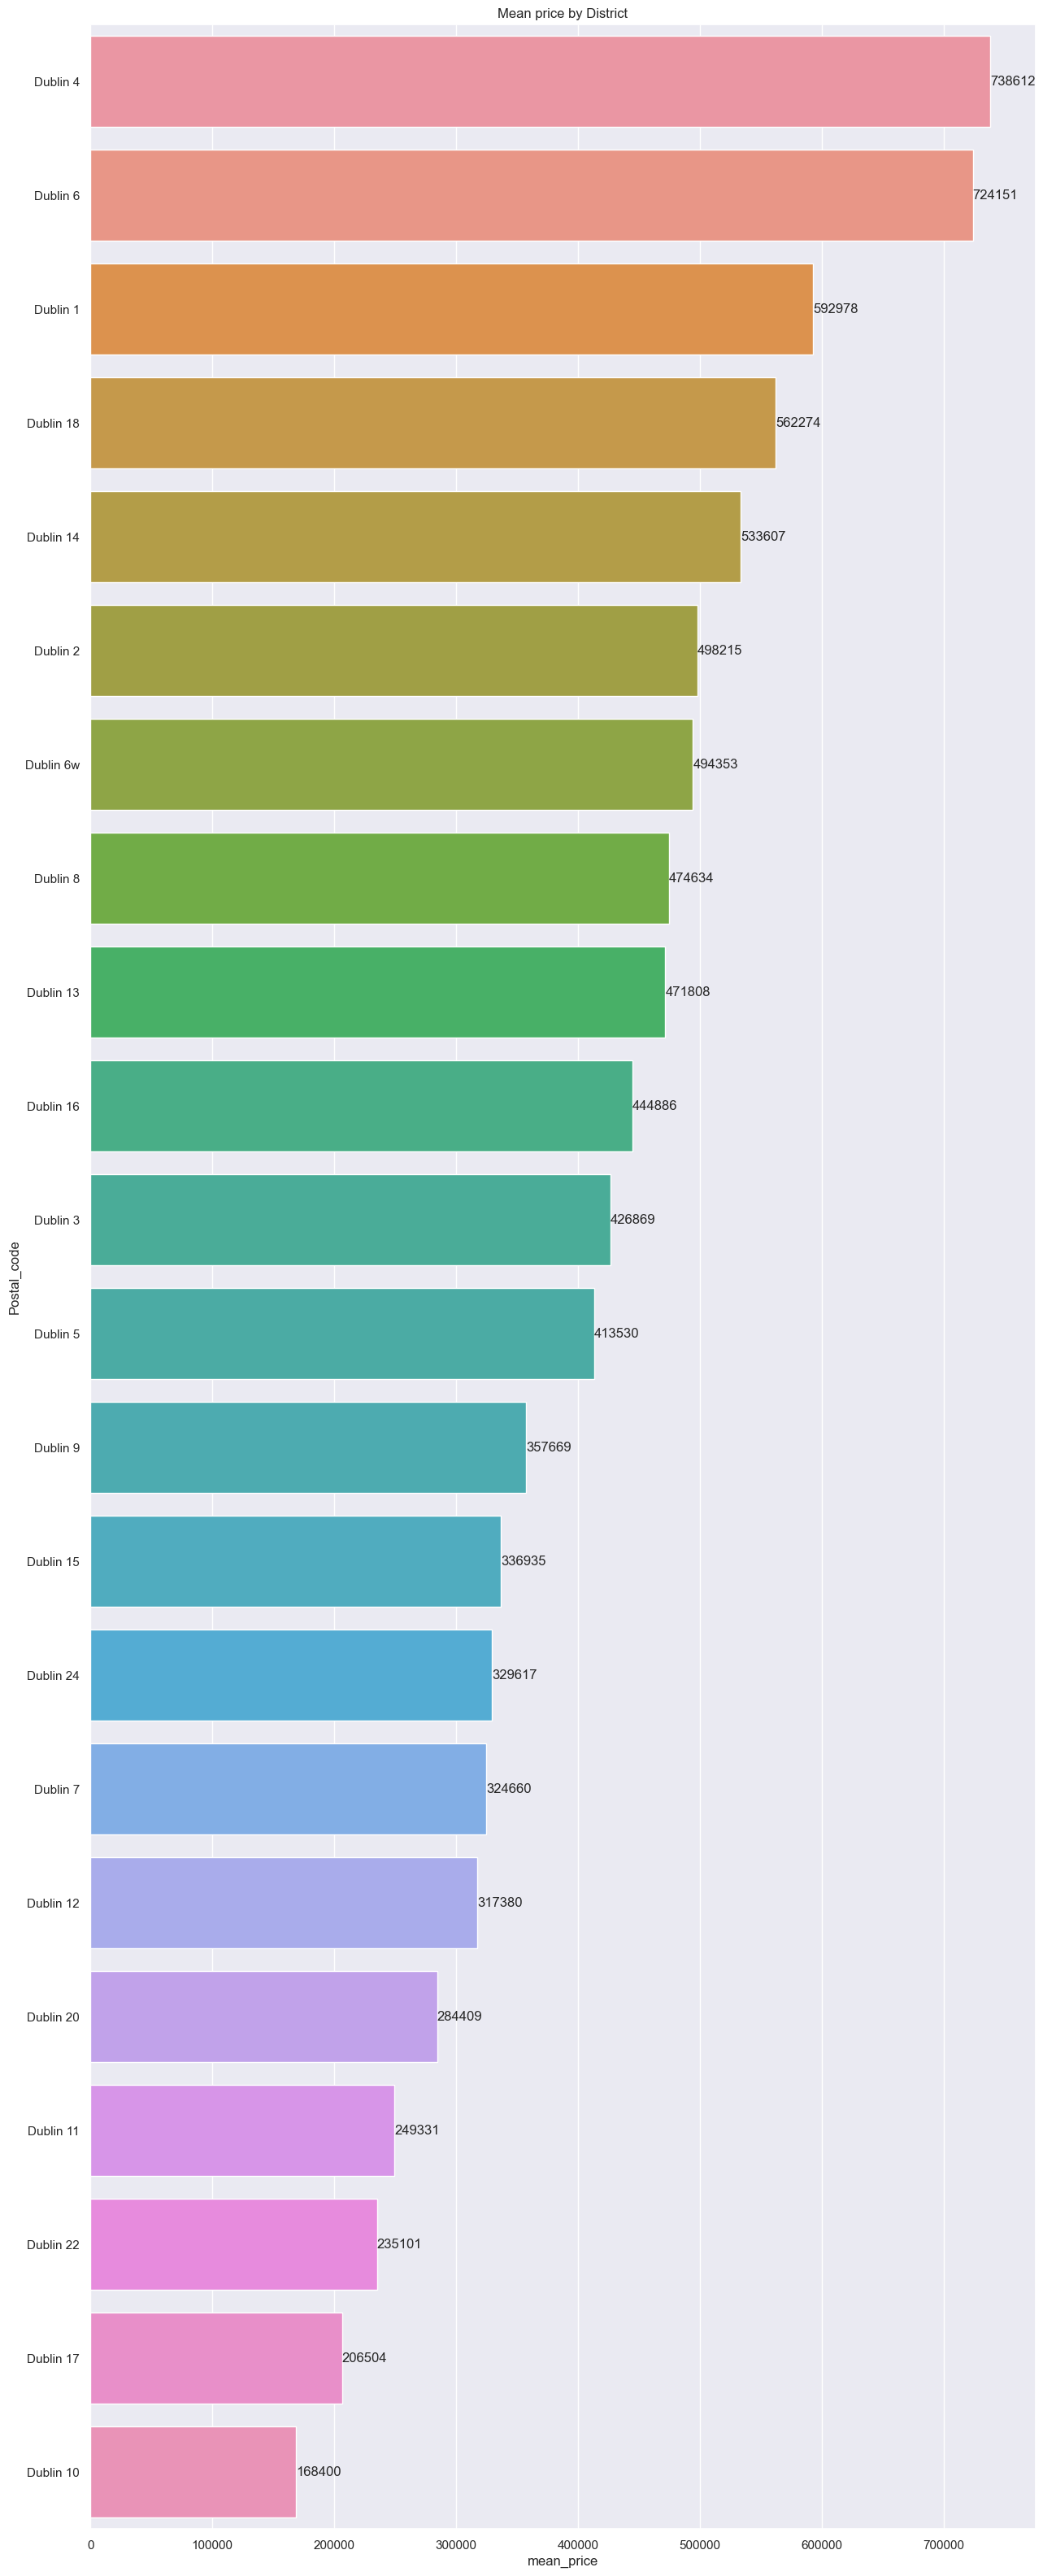

In [36]:
sns.set(rc={"figure.figsize":(15,40)}) # Size of our plot

# Plot our 22 unique values from Postal_code sorted by the mean value of Price_euro
ax = sns.barplot(data=df.groupby(by='Postal_code')['Price_euro'].mean().reset_index(name="mean_price").sort_values('mean_price', ascending=False).head(22), 
              y='Postal_code', x='mean_price')


ax.set(title="Mean price by District") # Title

# label each bar in barplot
for p in ax.patches:
    height = p.get_height() # Height of each horizontal bar is the same
    width = p.get_width() # Width (prices)
    # Adding text
    ax.text(x = width, # x-coordinate position of data label
    y = p.get_y()+(height/2), # y-coordinate position of data label, padded to be in the middle of the bar
    s = "{:.0f}".format(width), # Data label, formatted to ignore decimals
    va = "center") # Sets vertical alignment to center
    
#plt.savefig('seaborn_plot_fig4.jpg', format='jpg') # Save the plot as a jpg file

## Task 2 - Probability (Discrete):
<p></p>
- What is the probability of rolling exactly two 6s in five rolls of a fair die?
<p></p>
- The number of industrial injuries on average per working week in a factory is 0.75.
<p></p>
Assuming that the distribution of injuries follows a Poisson distribution, find the probability 
that in a particular week there will be no more than two accidents.

Stating the answers alone here is not sufficient - you should show clearly how you found your answer, justify any decisions made, and include plots where appropriate.
<p></p>
[15 Marks]


In [37]:
# Fair die
# Possible outcomes when we roll a die: 1,2,3,4,5,6 (total: 6)
# Number of favorable outcomes in each die = 1 
# We want exactly two 6s
# We will use Binoamial function, which is used to obtain the probability of observing X successes in N trials,
# with the probability of success in a single trial denoted by p (assumes that p is fixed for all trials)

from scipy.stats import binom

# We will use Probability Mass Function (pmf) that give us probabilities of possible values for a random variable
# k are the number of succeses = 2
# n is the number of trials = 5
# p is the probability = 1/6

result = binom.pmf(k=2, n=5, p=1/6)

print('Getting two 6s from 5 throws of a fair die: ', '{:.2f}'.format(result*100),'%')

Getting two 6s from 5 throws of a fair die:  16.08 %


In [38]:
# Injuries
# Mean number of injuries per week: 0.75 (lambda)
# Probablity that in a particular week there will be no more than 2 accidents: X <= 2
# Poisson distribution is a porbability distribution that can be used to model the number of events in a fixed interval

from scipy.stats import poisson

# We will use Probability Mass Function (pmf) that give us probabilities of possible values for a random variable

X = [0, 1, 2] # Number of injuries
lbda = 0.75 # Mean number of injuries per week

result_p = poisson.pmf(X, lbda)
print('Probablity of 0 injuries in a week: ', '{:.2f}'.format(result_p[0]*100),'%')
print('Probablity of 1 injuries in a week: ', '{:.2f}'.format(result_p[1]*100),'%')
print('Probablity of 2 injuries in a week: ', '{:.2f}'.format(result_p[2]*100),'%')

Probablity of 0 injuries in a week:  47.24 %
Probablity of 1 injuries in a week:  35.43 %
Probablity of 2 injuries in a week:  13.29 %


## Task 3 - Probability (Continuous):
<p></p>
The time a person spends at Dublin Zoo is Normally distributed with a mean of 90 minutes and a standard deviation of 10 minutes.
<p></p>
Using this distribution, answer the following:
<p></p>
- If a visitor is selected at random, find the probability that they will spend at most 85 minutes visiting the zoo.
<p></p>
- If a visitor is selected at random, find the probability that they will spend at least 100 minutes visiting the zoo.
<p></p>
- Given that you know that a particular visitor has spent longer than average visiting the Zoo, what is the probability that they have spent more than 100 minutes there?


Stating the answers alone here is not sufficient - you should show clearly how you found your answer, justify any decisions made, and include plots where appropriate.
<p></p>
[15 Marks]


In [39]:
# Zoo
# Mean time of a person at the Dublin Zoo: 90 minutes (loc)
# Standard deviation: 10 minutes (scale)
# Results: r1, r2 and r3

from scipy.stats import norm

# Normal Distribution (norm) is a probability distribution that is symmetric about the mean, showing that data near the 
# mean are more frequent in occurrence than data far from the mean.

# Cumulative Mass Function (cdf) describes the probabilities of a random variable having values less than or equal to X,
# it is cumulative because it sums the total likelihood up to that point.

r1 = norm.cdf(85, loc=90, scale=10)
print('Probability that a person spends at most 85min at the Zoo:', '{:.2f}'.format(r1*100),'%')

r2 = 1-norm.cdf(100, loc=90, scale=10)
print('Probability that a person spends at least 100min at the Zoo:', '{:.2f}'.format(r2*100),'%')

r3 = 1-norm.cdf(100, loc=90, scale=10)
print('Probability that a person spends more than 100min at the Zoo:', '{:.2f}'.format(r3*100),'%')

Probability that a person spends at most 85min at the Zoo: 30.85 %
Probability that a person spends at least 100min at the Zoo: 15.87 %
Probability that a person spends more than 100min at the Zoo: 15.87 %
